In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

haha


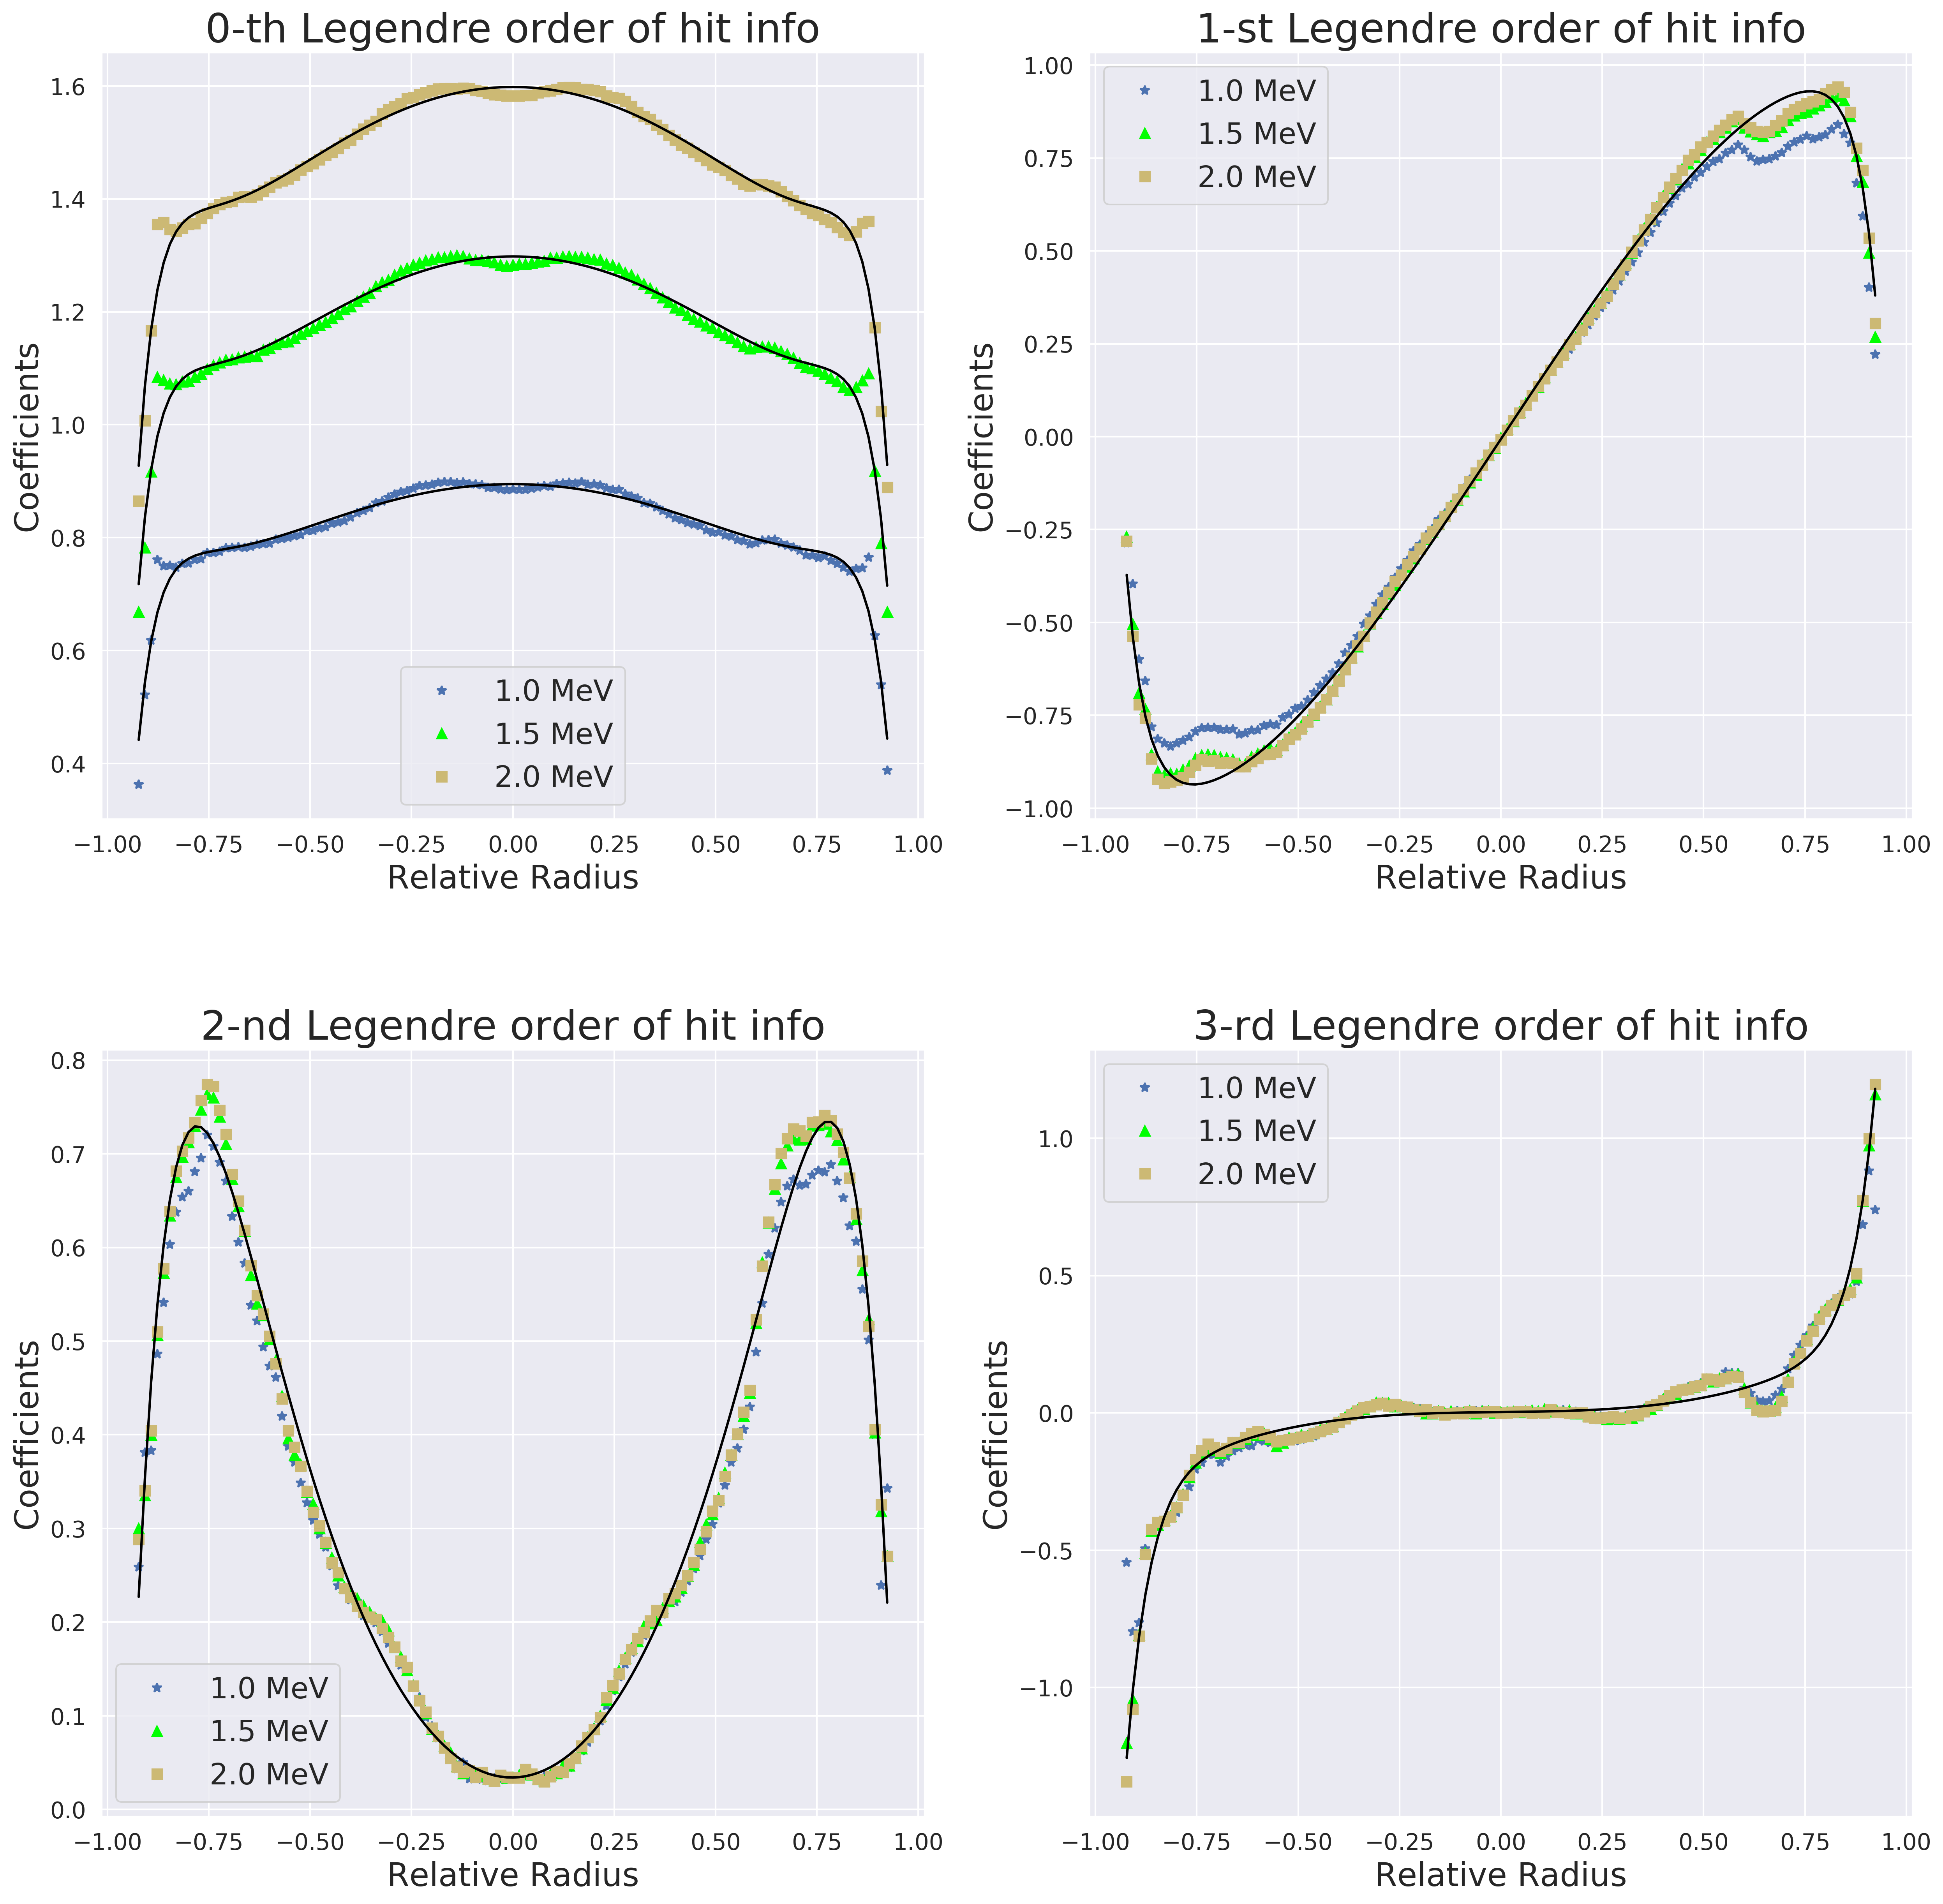

In [42]:
import os
import tables
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

poly_model = make_pipeline(PolynomialFeatures(32), Lasso(alpha=0.0001))

radius = np.arange(0.6001, -0.60, -0.01)
xfit = radius/0.65

def findfile(direct, radius):
    
    filename = '../' + direct + '/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.expect)[:]
    h.close()
    return coeff, expect, predict

line1 = []
line2 = []
line3 = []

coeff = [];
expect = [];
predict = [];

for i in radius:
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile('coeff_pe_1t_1.0MeV',file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff = np.array(coeff)

plt.figure(figsize=(20,20),dpi=300)
for i in np.arange(4):
    plt.subplot(2,2,i+1)
    line1.append(plt.plot(xfit, pe_coeff[:,i],'b*',linewidth=1.5))
    poly_model.fit(xfit[:, np.newaxis], pe_coeff[:,i])
    yfit = poly_model.predict(xfit[:, np.newaxis])
    if(i==0):
        plt.plot(xfit, yfit, c='black')

coeff = [];
expect = [];
predict = [];

for i in radius:
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile('coeff_pe_1t_1.5MeV',file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff = np.array(coeff)


for i in np.arange(4):
    plt.subplot(2,2,i+1)
    line2.append(plt.plot(xfit, pe_coeff[:,i],'^',color = 'lime',linewidth=1.5)) 
    poly_model.fit(xfit[:, np.newaxis], pe_coeff[:,i])
    yfit = poly_model.predict(xfit[:, np.newaxis])
    if(i==0):
        plt.plot(xfit, yfit, c='black')

coeff = [];
expect = [];
predict = [];

for i in radius:
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile('coeff_pe_1t_2.0MeV',file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff = np.array(coeff)

for i in np.arange(4):
    plt.subplot(2,2,i+1)
    line3.append(plt.plot(xfit, pe_coeff[:,i],'ys',linewidth=1.5))
    poly_model.fit(xfit[:, np.newaxis], pe_coeff[:,i])
    yfit = poly_model.predict(xfit[:, np.newaxis])
    plt.plot(xfit, yfit, c='black')


for i in np.arange(4):
    fig = plt.subplot(2,2,i+1)
    plt.legend((line1[i][0], line2[i][0], line3[i][0]), ('1.0 MeV','1.5 MeV','2.0 MeV'),\
               frameon='True', fontsize=18)
    
    plt.xlabel('Relative Radius',fontsize=20)
    plt.ylabel('Coefficients',fontsize=20)
    plt.yticks(fontproperties = 'Times New Roman', size = 14)
    plt.xticks(fontproperties = 'Times New Roman', size = 14)
    
    if (i == 1):
        plt.title('%d-st Legendre order of hit info' % i,fontsize=25) 
    if (i == 2):
        plt.title('%d-nd Legendre order of hit info' % i,fontsize=25) 
    if (i == 3):
        plt.title('%d-rd Legendre order of hit info' % i,fontsize=25) 
    if (i == 0):
        plt.title('%d-th Legendre order of hit info' % i,fontsize=25) 
    #fig.patch.set_facecolor('lightsteelblue')
plt.subplots_adjust(wspace = 0.2, hspace =0.3)
#plt.show()
plt.savefig('PE1.pdf')

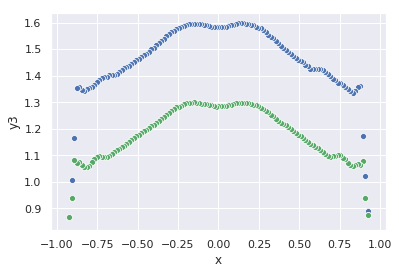

In [8]:
import os
import tables
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")
warnings.filterwarnings("ignore")

poly_model = make_pipeline(PolynomialFeatures(32), Lasso(alpha=0.0001))

radius = np.arange(0.6001, -0.60, -0.01)
xfit = radius/0.65

def findfile(direct, radius):
    
    filename = '../' + direct + '/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.expect)[:]
    h.close()
    return coeff, expect, predict

line1 = []
line2 = []
line3 = []

expect = [];
predict = [];
coeff1 = [];
coeff2 = [];
coeff3 = [];
for i in radius:
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile('coeff_pe_1t_2.0MeV',file_str)
    coeff1.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff1 = np.array(coeff1)

for i in radius:
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile('coeff_pe_1t_1.5MeV',file_str)
    coeff2.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff2 = np.array(coeff2)

for i in radius:
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile('coeff_pe_1t_1.5MeV',file_str)
    coeff3.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff3 = np.array(coeff3)



    

    
for i in np.arange(1):
    data = []
    for j in range(np.size(xfit)):
        x_t = xfit[j]
        y1_t = pe_coeff1[j,i]
        y2_t = pe_coeff2[j,i]
        y3_t = pe_coeff3[j,i]
        data.append([x_t, y1_t, y2_t, y3_t])
    df1 = pd.DataFrame(data,columns=['x','y1','y2','y3'])
    sns.scatterplot(x="x", y="y1",
             data=df1)
    sns.scatterplot(x="x", y="y2",
             data=df1)
    sns.scatterplot(x="x", y="y3",
             data=df1)
    #line1.append(plt.plot(xfit, pe_coeff[:,i],'b*',linewidth=1.5))
    #poly_model.fit(xfit[:, np.newaxis], pe_coeff[:,i])
    #yfit = poly_model.predict(xfit[:, np.newaxis])
    #plt.plot(xfit, yfit, c='black')


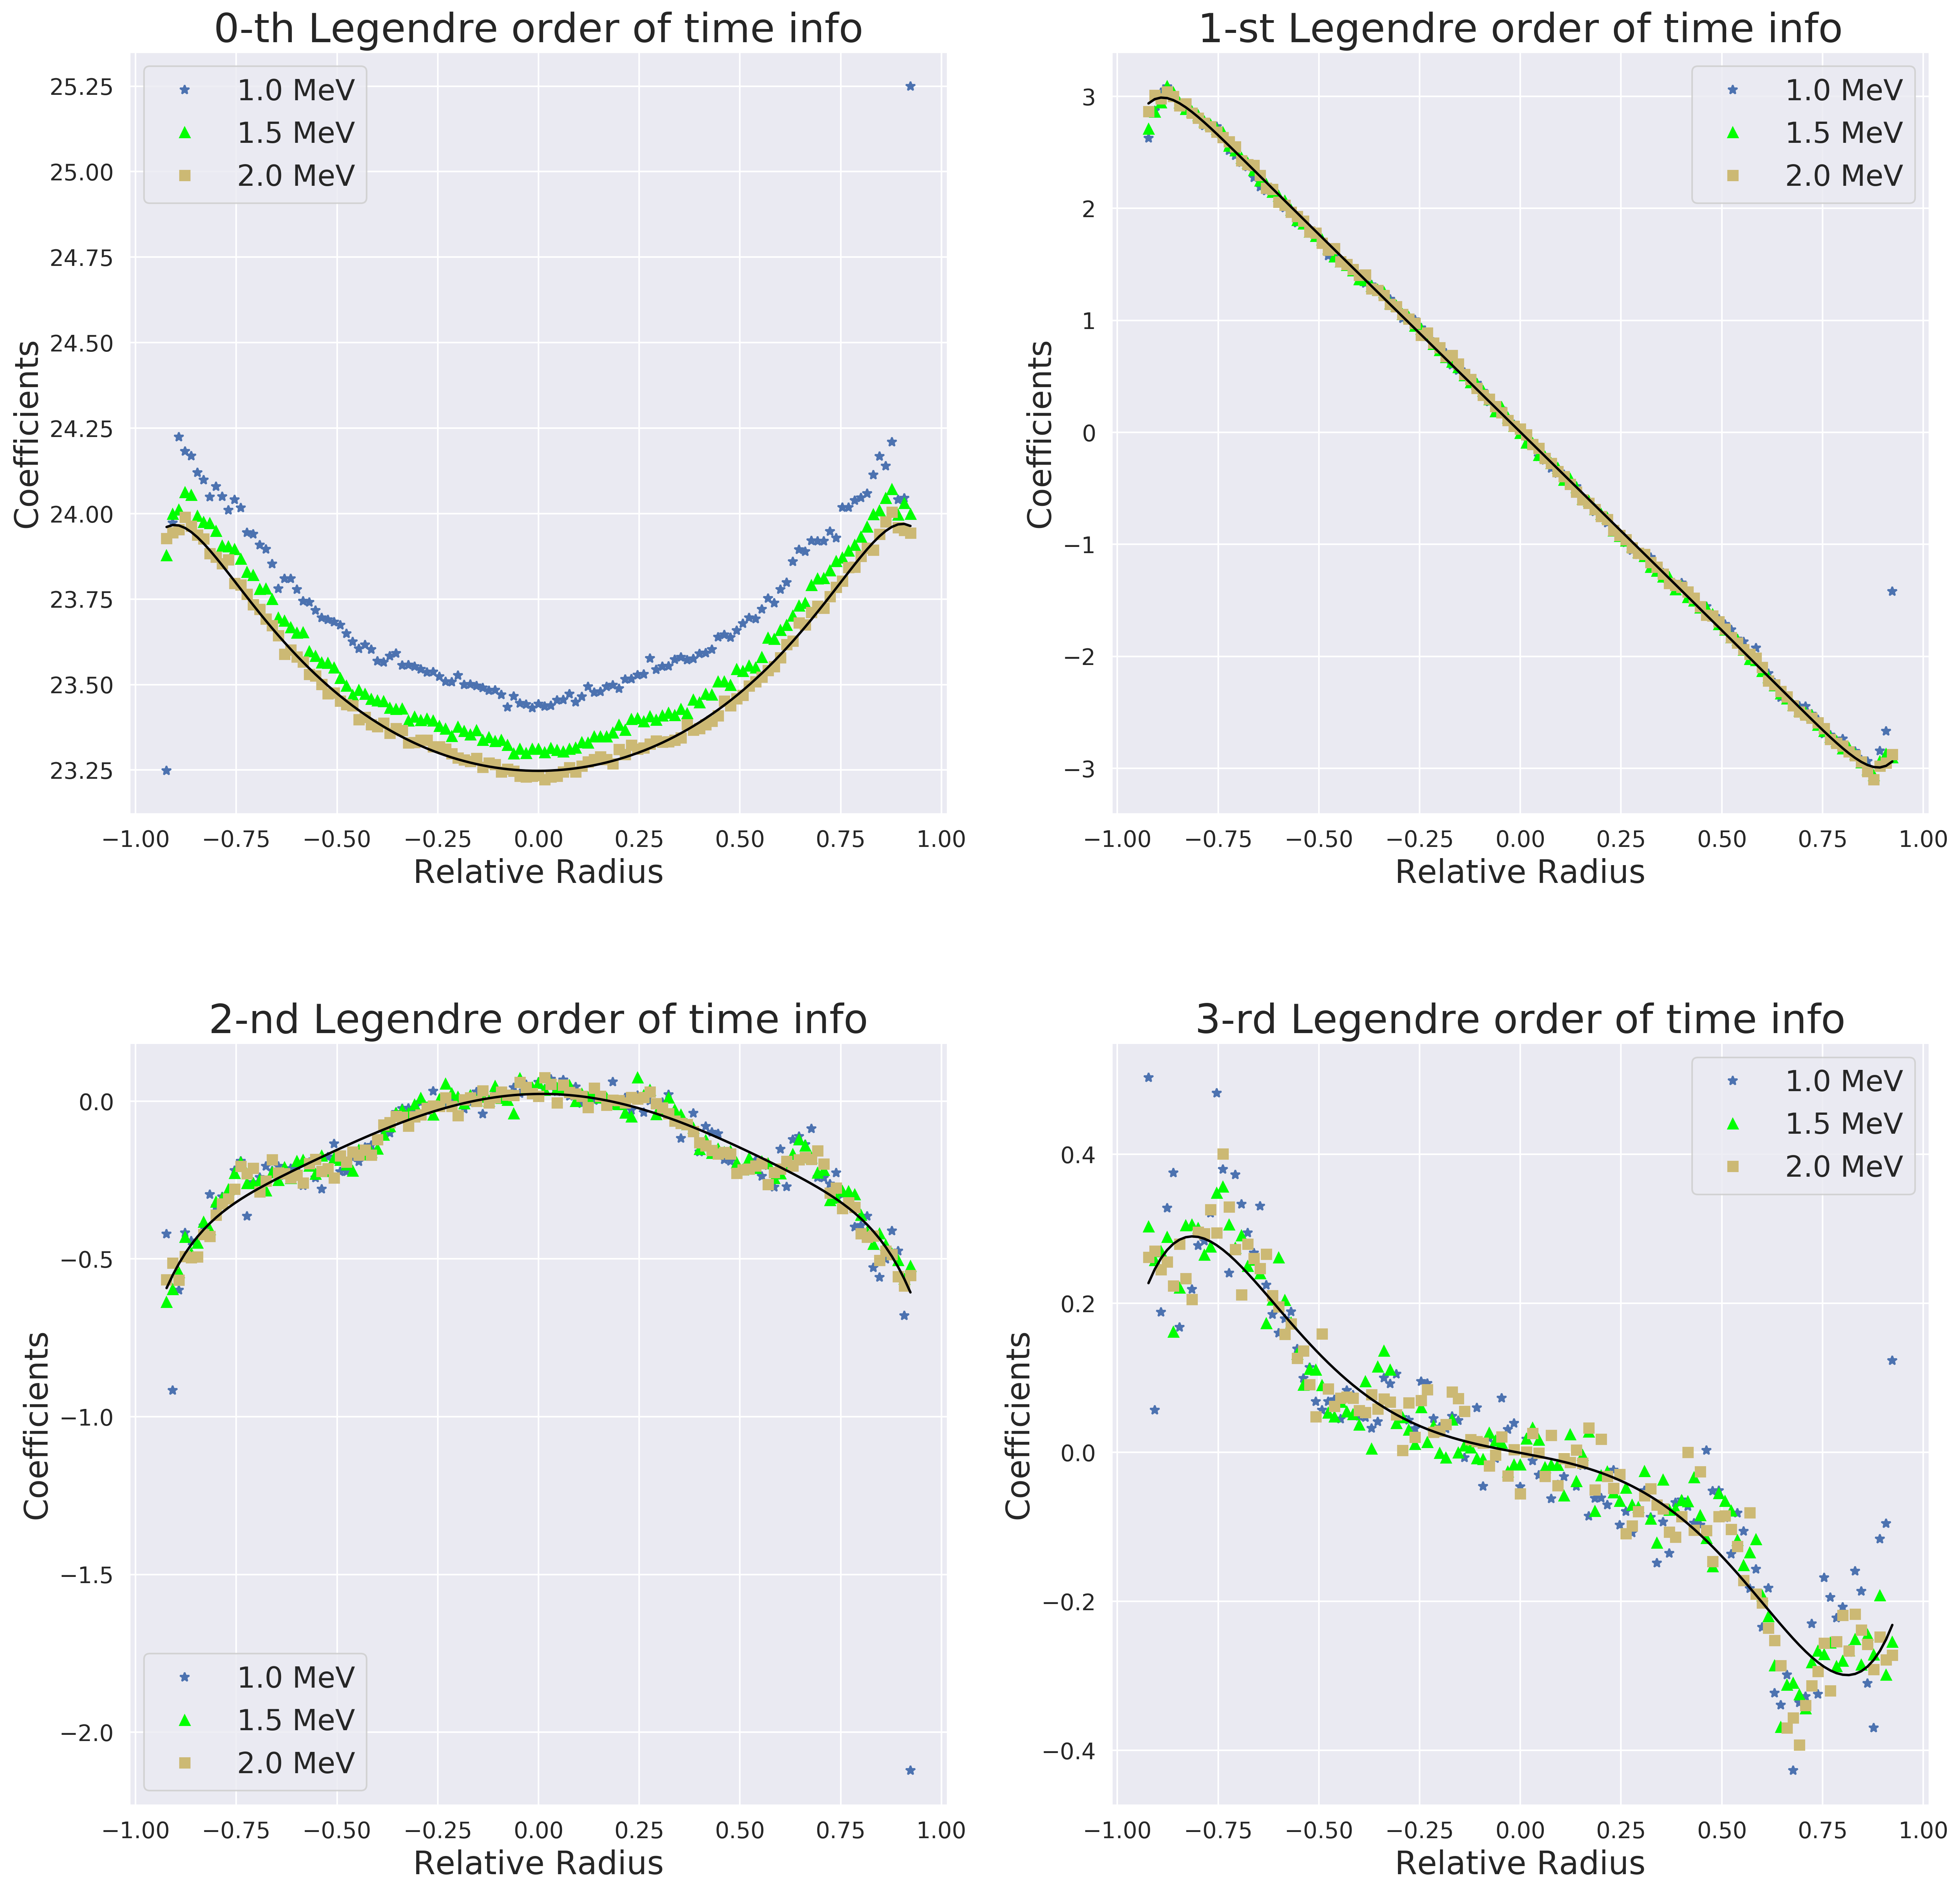

In [41]:
import os
import tables
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

poly_model = make_pipeline(PolynomialFeatures(32), Lasso(alpha=0.0001))

radius = np.arange(0.6001, -0.60, -0.01)
xfit = radius/0.65

def findfile(direct, radius):
    
    filename = '../' + direct + '/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff
line1 = []
line2 = []
line3 = []

coeff = [];
expect = [];
predict = [];

for i in radius:
    file_str = '%+.2f' % i
    a1 = findfile('coeff_time_1t_1.0MeV',file_str)
    coeff.append(a1)

time_coeff = np.array(coeff)

plt.figure(figsize=(20,20),dpi=300)
for i in np.arange(4):
    plt.subplot(2,2,i+1)
    line1.append(plt.plot(xfit, time_coeff[:,i],'b*',linewidth=1.5))
    poly_model.fit(xfit[:, np.newaxis], time_coeff[:,i])
    yfit = poly_model.predict(xfit[:, np.newaxis])

coeff = [];
expect = [];
predict = [];

for i in radius:
    file_str = '%+.2f' % i
    a1 = findfile('coeff_time_1t_1.5MeV',file_str)
    coeff.append(a1)
time_coeff = np.array(coeff)


for i in np.arange(4):
    plt.subplot(2,2,i+1)
    line2.append(plt.plot(xfit, time_coeff[:,i],'^',color = 'lime',linewidth=1.5)) 
    poly_model.fit(xfit[:, np.newaxis], time_coeff[:,i])
    yfit = poly_model.predict(xfit[:, np.newaxis])

coeff = [];
expect = [];
predict = [];

for i in radius:
    file_str = '%+.2f' % i
    a1 = findfile('coeff_time_1t_2.0MeV',file_str)
    coeff.append(a1)

time_coeff = np.array(coeff)

for i in np.arange(4):
    plt.subplot(2,2,i+1)
    line3.append(plt.plot(xfit, time_coeff[:,i],'ys',linewidth=1.5))
    poly_model.fit(xfit[:, np.newaxis], time_coeff[:,i])
    yfit = poly_model.predict(xfit[:, np.newaxis])
    plt.plot(xfit, yfit, c='black')


for i in np.arange(4):
    fig = plt.subplot(2,2,i+1)
    plt.legend((line1[i][0], line2[i][0], line3[i][0]), ('1.0 MeV','1.5 MeV','2.0 MeV'),\
               frameon='True', fontsize=18)
    
    plt.xlabel('Relative Radius',fontsize=20)
    plt.ylabel('Coefficients',fontsize=20)
    plt.yticks(fontproperties = 'Times New Roman', size = 14)
    plt.xticks(fontproperties = 'Times New Roman', size = 14)
    if (i == 1):
        plt.title('%d-st Legendre order of time info' % i,fontsize=25) 
    if (i == 2):
        plt.title('%d-nd Legendre order of time info' % i,fontsize=25) 
    if (i == 3):
        plt.title('%d-rd Legendre order of time info' % i,fontsize=25) 
    if (i == 0):
        plt.title('%d-th Legendre order of time info' % i,fontsize=25) 
    #fig.patch.set_facecolor('lightsteelblue')
plt.subplots_adjust(wspace = 0.2, hspace =0.3)
#plt.show()
plt.savefig('TIME1.pdf')